# <span id="chape_concepts_degree"></span> Degree

Having developed ideas of networks, nodes, and edges, we can start to ask questions about the properties of these elements, both individually and together. Perhaps the most basic property of a node is its *degree*, by which we mean the number of other nodes to which it is adjacent. In general nodes may have any whole-numbered (integer) degree &ndash; including zero, for an *isolated* node that is not connected to any other. Degree therefore brings together nodes and edges, and also issues of connectedness.

We can of course calculate the total degree of a network by summing-up the degrees of all the nodes. For a [simple network](#def_simple_network), the total degree will be twice the number of edges in the network, since every edge is incident on two different nodes. 

## <span id="sec_concepts_degree_distribution"></span> Degree distribution

We now come to what is often seen as the most critical property of a complex network: its *degree distribution*.

The degree of a node &ndash; the number of other nodes to which it is adjacent &ndash; is a *local* property: it applies to a single "location" (node) in the network. By contrast, the degree distribution is a *global* property that describes the way in which the degrees of nodes varies across the entire network. The simplest way to thik about the degree distribution is to visit each node in the network, count its degree, and then sum-up the number of nodes of each degree: essentially we build a histogram of the node degrees. Clearly any network will have a largest (maximal) and smallest (minimal) degree, with the latter typically being either zero or one.

In [11]:
import sys
sys.path.append('src')

import networkx as nx
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

from cncp import *

Let us look at the degree distribution of the lattice networks we defined [earlier](concepts-networks.ipynb#sec_concepts_networks_lattice). Firstly, we create a lattice of the desired size: 

In [7]:
mesh = lattice_graph(9, 9)

We can then compute the maximal and minimal degrees of this network:

In [8]:
# extract the degrees of all the nodes in the mesh
dist = mesh.degree().values()

# compute the bounds and histogram
min_degree = min(dist)
max_degree = max(dist)

print "Mesh minimal degree {min}, maximal degree {max}".format(min = min_degree, max = max_degree)

Mesh minimal degree 2, maximal degree 4


What about the degrees in between? The easiest way to look at degree distribution, at least for networks with only a moderate range of degrees, is with a histogram. To show how the degree distribution histogram is created, we'll draw the mesh with nodes coloured according to their degrees, and then plot the corresponding histogram of degrees:

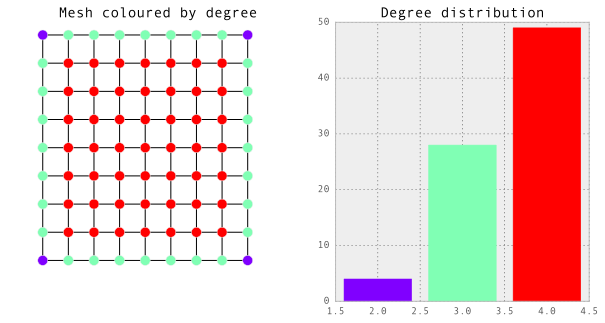

In [10]:
# build a histogram of degrees values
(hist, bins) = np.histogram(dist,
                            bins = range(min_degree, max_degree + 2))

# colour map we'll use for indicating the degree of a node
colour_map = plt.cm.rainbow

# draw the mesh, colouring the nodes according to their degree
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
_ = ax1.set_title("Mesh coloured by degree")
_ = ax1.set_axis_off()
draw_lattice(mesh, ax = ax1, with_labels = False, node_size = 100,
             node_color = dist, cmap = colour_map, vmin = min_degree, vmax = max_degree)
_ = ax1.set_xlim([-0.05, 1.05])
_ = ax1.set_ylim([-0.05, 1.05])

# draw the degree distribution histogram, colouring the bars
# to correspond to the colours of the mesh drawing
ax2 = fig.add_subplot(1, 2, 2)
_ = ax2.set_title("Degree distribution")
bars = ax2.bar(bins[:-1], hist, align = 'center')
for i in xrange(len(bars)):
    bars[i].set_color(colour_map((bins[i] - min_degree + 0.0) / (max_degree - min_degree)))
    
_ = plt.show()

Most of the nodes have (maximal) degree four, lying in the middle of the mesh. There are a smaller number of edge nodes with degree three, and an even smaller number (actually just the four corners) with (minimal) degree two.

Why is degree distribution considered so critical? The degree of a node determines how many neighbours it has; the degree distribution controls the relative abundance of nodes with lots of neighbours, and so indirectly the likelihood that a node is neighbour to *another* node with lots of neighbours, and so forth. But there's more to it than that. The degree distribution controls whether the network is mainly made up of high-degree nodes, or of mainly low-degree nodes, or is somehow balanced between them.

But it's the interactions with other properties that make degree distribution perhaps the most critical single property of a network. To see why, consider two networks with the same number of nodes where one has mainly high-degree nodes and one mainly low-degree nodes. Suppose further that we link nodes together randomly. If lots of nodes have high degree, then clearly each node will in general be linked to a higher proportion of nodes in the network than in the case where nodes have low degree. And this implies that nodes are "closer together": one in general has to traverse fewer edges to get between a given pair of nodes than in the low-degree case. So the degree distribution affects the average shortest path between any two nodes selected at random: the graph has a smaller diameter. And *this* in turn is important, because (as we'll see later) a lot of processes that run over networks are affected critically by the diameter, since they can spread more efficiently through networks with low diameters. The degree distribution is the strongest contributor to diameter, although there are other contributing factors too: we discuss these more below when we talk about topological sensitivity and assortativity.

The word "distribution" suggests a link to probability, and indeed we can view the degree distribution exactly like this: if we choose a node from the network at random, what is the probability that we will choose a node with a given degree (say, degree 2)? We can convert the number of nodes with degree $k$ into the probability that a randomly-chosen node has degree $k$ by dividing the number of nodes of degree $k$ by the number of nodes in the network, $N$.